Basic Imports

In [1]:
import marketData
import Orders
import Plot
import Indicators

Getting price charts

                        Open     High      Low    Close   Volume
Time                                                            
2021-03-03 09:08:00  1.25414  1.25469  1.25300  1.25401   538878
2021-03-03 09:09:00  1.25403  1.25520  1.25298  1.25481   425090
2021-03-03 09:10:00  1.25481  1.25485  1.25254  1.25302   213821
2021-03-03 09:11:00  1.25314  1.25386  1.25259  1.25354   288452
2021-03-03 09:12:00  1.25361  1.25410  1.25200  1.25209   271573
...                      ...      ...      ...      ...      ...
2021-03-03 17:23:00  1.24734  1.24778  1.24608  1.24637   534248
2021-03-03 17:24:00  1.24638  1.24787  1.24600  1.24743   648130
2021-03-03 17:25:00  1.24711  1.24750  1.23970  1.24142  1871695
2021-03-03 17:26:00  1.24142  1.24300  1.23968  1.24031  1046994
2021-03-03 17:27:00  1.24031  1.24223  1.24015  1.24196   254392

[500 rows x 5 columns]
[        nan         nan         nan         nan         nan         nan
         nan         nan 72.12529877 79.65314034 79.476692

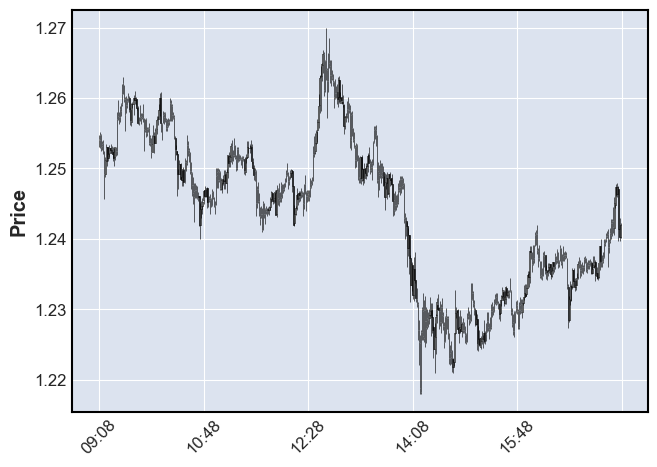

In [2]:
df = marketData.getPrices("ADAUSDT", "1m", 500)
print(df)
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
print(df)
Plot.plotCandles(df)

Getting SR levels from the order book

In [3]:
df = Orders.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)